In [1]:
from triqs.plot.mpl_interface import oplot,plt
from triqs.gf import GfImFreq, inverse, iOmega_n, SemiCircular
from h5 import HDFArchive
from sklearn.linear_model import LinearRegression
import numpy as np

## Utils

In [2]:
def fuse_eo(u):
    n = len(u)
    assert n%2==0
    m = n//2
    v = np.zeros(m,dtype=type(u[0]))
    for k in range(m-1):
        v[k] = u[2*k]+u[2*k+1]
    return v

In [3]:
def pad(u):
   n = max([len(x) for x in u])
   res = np.zeros((len(u),n))
   for i in range(len(u)):
      res[i,:len(u[i])] = u[i]
   return res

## Run

In [18]:
nid = 10
id0 = 14
ids = np.arange(id0,id0+nid,dtype=int)

files  = []
files2 = []

Ns  = []
Ns2 = []

beta = []
U    = []
delta  = []
delta0 = []
n_cycles = []

for id in ids:
    files.append(f"data/{id}test_solver.h5")
    files2.append(f"data/{id}test_solver2.h5")

    with HDFArchive(files[-1],'r') as A:
        Ns.append(A['N'])
        beta.append(A['beta'])
        U.append(A['U'])
        delta.append(A['delta'])
        delta0.append(A['delta0'])

    with HDFArchive(files2[-1],'r') as B:
        Ns2.append(B['N'])
        #n_cycles.append(B['n_cycles'])
        assert beta[-1] == B['beta']
        assert U[-1] == B['U']
        assert delta[-1] == B['delta']
        assert delta0[-1] == B['delta0']

beta = np.array(beta,dtype=float)
U    = np.array(U,   dtype=float)
delta  = np.array(delta, dtype=float)
delta0 = np.array(delta0,dtype=float)

print(f"Ns\t= {Ns}")
print(f"Ns2\t= {Ns2}")
print(f"beta\t= {beta}")
print(f"U\t= {U}")
print(f"delta\t= {delta}")
print(f"delta0\t= {delta0}")
#print(f"n_cycles\t= {n_cycles}")

ids = ids-id0

Ns	= [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
Ns2	= [10, 10, 10, 9, 9, 8, 9, 8, 6, 8]
beta	= [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
U	= [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
delta	= [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
delta0	= [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


## Time

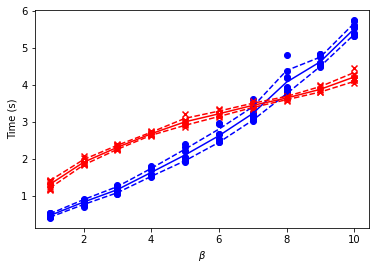

In [25]:
id1 = 5

x = beta
xlab = "\\beta"
T = np.zeros(nid)
dT = np.zeros(nid)
T2 = np.zeros(nid)
dT2 = np.zeros(nid)

for id in ids:
    with HDFArchive(files[id],'r') as A:
        plt.scatter(np.full(A['t'].shape,x[id]),A['t'],color='b',marker='o')
        T[id] = A['t'].mean()
        dT[id] = np.sqrt(A['t'].var())

    with HDFArchive(files2[id],'r') as B:
        plt.scatter(np.full(B['t'].shape,x[id]),B['t'],color='r',marker='x')
        T2[id] = B['t'].mean()
        dT2[id] = np.sqrt(B['t'].var())

plt.plot(x,T,'b')
plt.plot(x,T+dT,'b--')
plt.plot(x,T-dT,'b--')

plt.plot(x,T2,'r')
plt.plot(x,T2+dT2,'r--')
plt.plot(x,T2-dT2,'r--')

plt.ylabel("Time (s)")
plt.xlabel(f"${xlab}$")
plt.show()

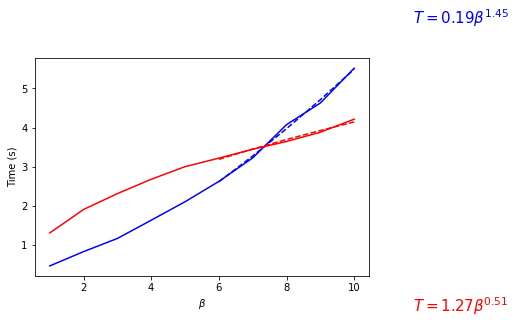

In [26]:
id1 = 5
x = beta
xlab = "\\beta"
T = np.zeros(nid)
T2 = np.zeros(nid)
for id in ids:
    with HDFArchive(files[id],'r') as A:
        T[id] = A['t'].mean()
    with HDFArchive(files2[id],'r') as B:
        T2[id] = B['t'].mean()
reg = LinearRegression()

reg.fit(np.log(x[id1:]).reshape(-1,1),np.log(T[id1:]).reshape(-1,1))
plt.plot(x,T,'b')
plt.plot(x[id1:],np.exp(reg.predict(np.log(x[id1:]).reshape(-1,1))),'b--')
plt.text(1,1,f"$T = {np.exp(reg.intercept_[0]):.2f}{xlab}^{{ {reg.coef_[0,0]:.2f} }}$",fontsize=15,color='b',transform=plt.gcf().transFigure)

reg.fit(np.log(x[id1:]).reshape(-1,1),np.log(T2[id1:]).reshape(-1,1))
plt.plot(x,T2,'r')
plt.plot(x[id1:],np.exp(reg.predict(np.log(x[id1:]).reshape(-1,1))),'r--')
plt.text(1,0,f"$T = {np.exp(reg.intercept_[0]):.2f}{xlab}^{{ {reg.coef_[0,0]:.2f} }}$",fontsize=15,color='r',transform=plt.gcf().transFigure)

plt.ylabel("Time (s)")
plt.xlabel(f"${xlab}$")
plt.show()

## Histogram

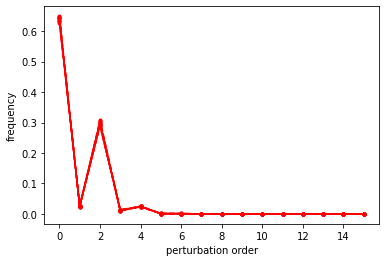

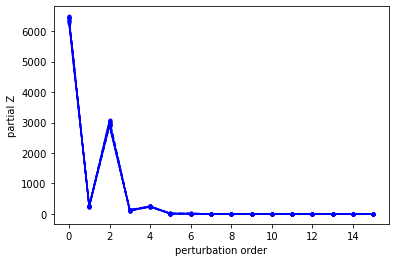

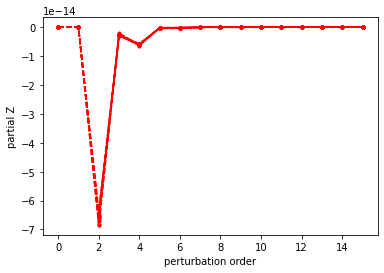

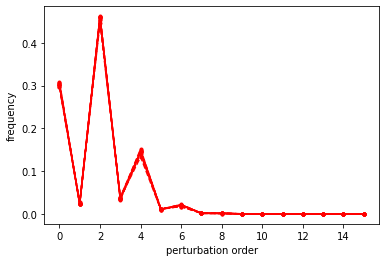

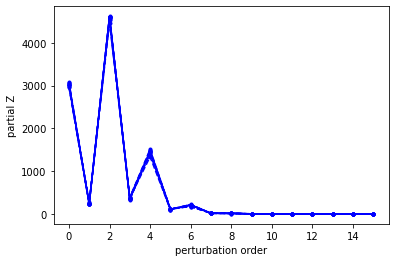

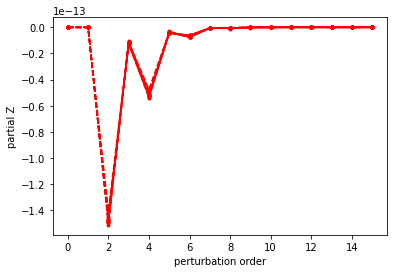

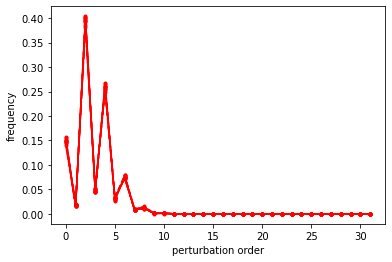

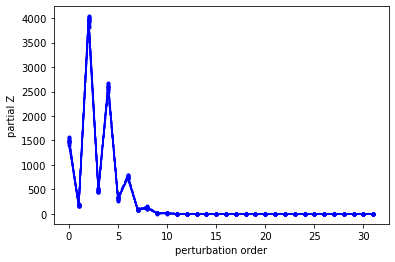

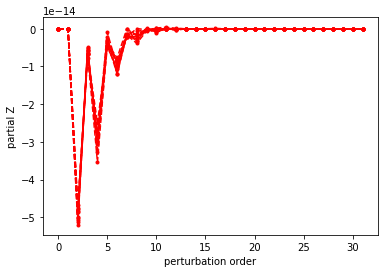

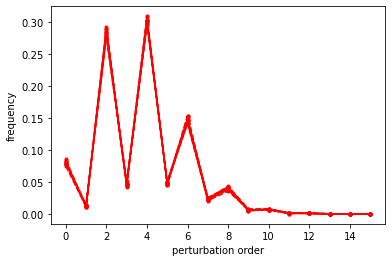

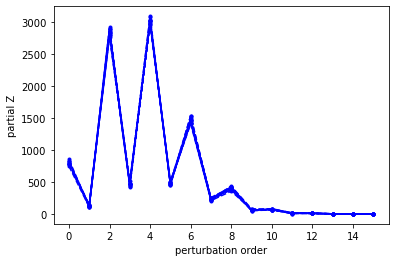

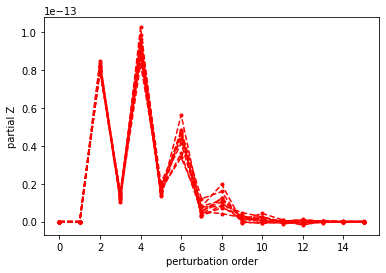

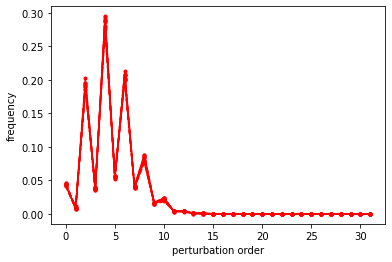

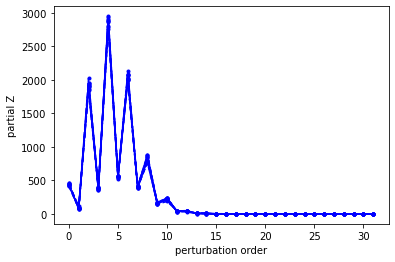

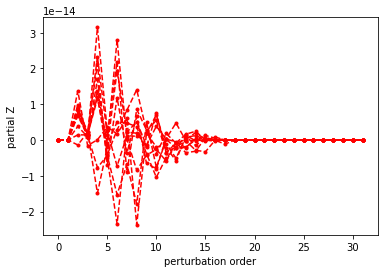

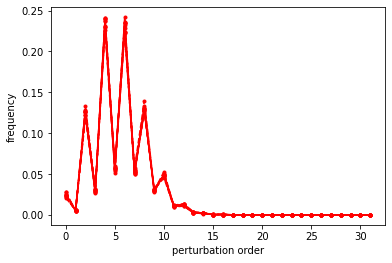

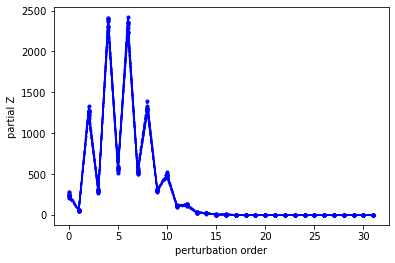

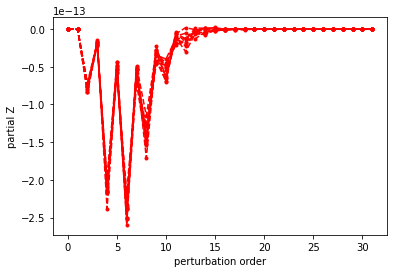

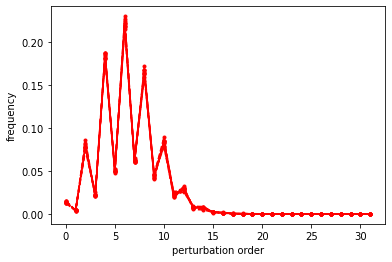

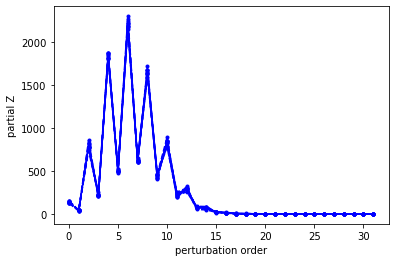

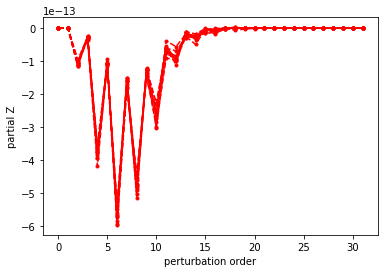

In [ ]:
for id in ids:
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A['hist'][i])
            k = np.arange(N)
            plt.plot(k,A['hist'][i],'r.--')
        plt.ylabel("frequency")
        plt.xlabel("perturbation order")
        plt.show()

        for i in range(Ns[id]):
            N = len(A[f'hist_sign'][i])
            k = np.arange(N)
            plt.plot(k,A[f'hist_sign'][i].real,'b.--')
        plt.ylabel("partial Z")
        plt.xlabel("perturbation order")
        plt.show()

        for i in range(Ns[id]):
            N = len(A[f'hist_sign'][i])
            k = np.arange(N)
            plt.plot(k,A[f'hist_sign'][i].imag,'r.--')
        plt.ylabel("partial Z")
        plt.xlabel("perturbation order")
        plt.show()

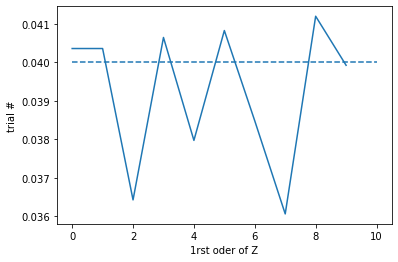

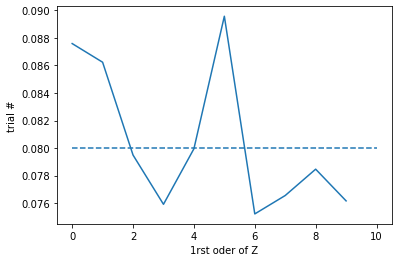

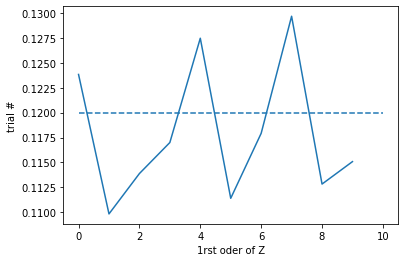

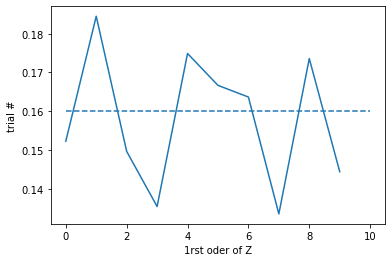

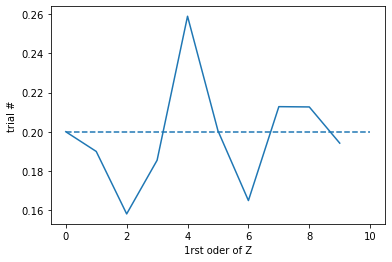

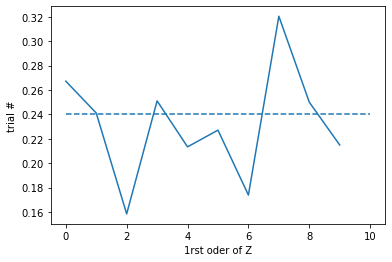

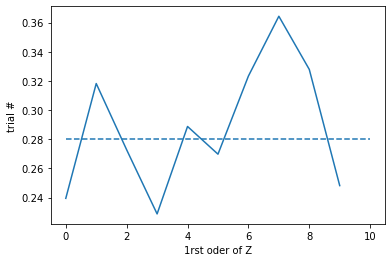

In [ ]:
for id in ids:
    g = GfImFreq(beta=beta[id],indices=[0])
    mu = U[id]/2
    half_bandwidth = 1.0
    g << inverse(iOmega_n + mu - U[id]*delta0[id] - (half_bandwidth/2.0)**2 * SemiCircular(half_bandwidth) )
    n = g.density()[0,0].real
    k = np.arange(Ns[id])
    Z1 = np.zeros(Ns[id],dtype=complex)

    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            Z1[i] = A[f"hist_sign"][i][1]/A[f"hist_sign"][i][0]

    plt.plot(k,Z1.real)
    Z1_th = -U[id]*beta[id]*(n-delta0[id]+delta[id])*(n-delta0[id]-delta[id])
    plt.hlines(Z1_th,0,Ns[id],linestyles='--') #,colors='g'
    plt.ylabel("1rst oder of Z")
    plt.xlabel("trial #")
    plt.show()

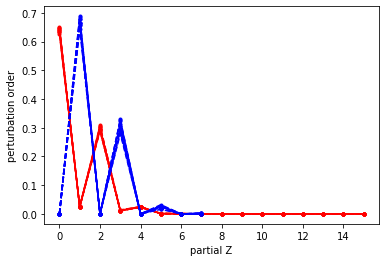

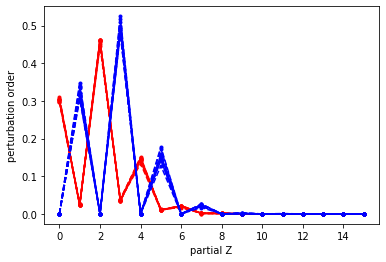

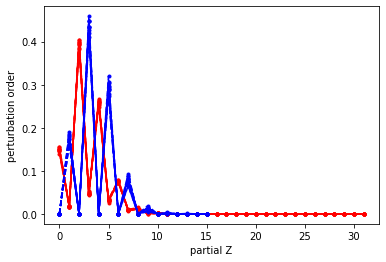

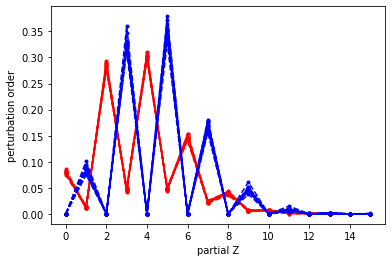

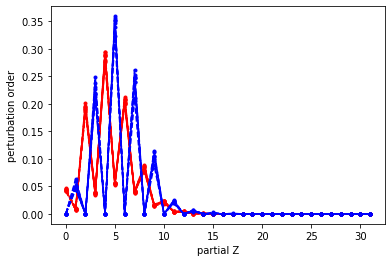

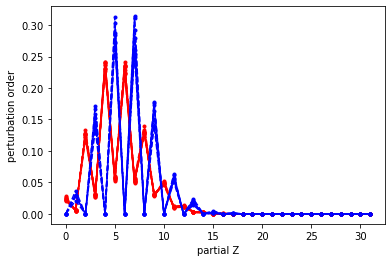

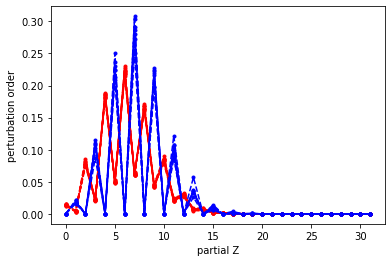

In [ ]:
for id in ids:
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist'][i])
            k = np.arange(N)
            plt.plot(k,A[f'hist'][i],'r.--')

    with HDFArchive(files2[id],'r') as B:
        for i in range(Ns2[id]):
            N = len(B[f'hist'][i])
            k = np.arange(N)
            plt.plot(k,B[f'hist'][i],'b.--')
    plt.ylabel("partial Z")
    plt.xlabel("perturbation order")
    plt.show()

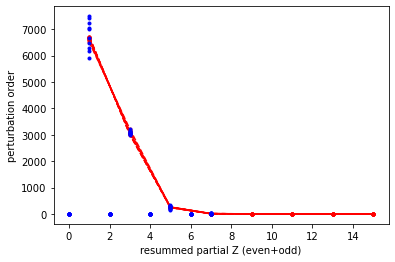

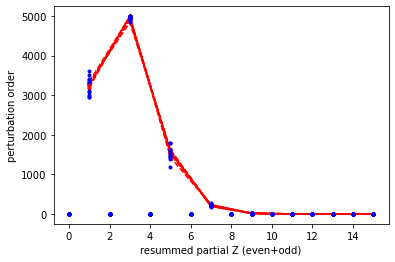

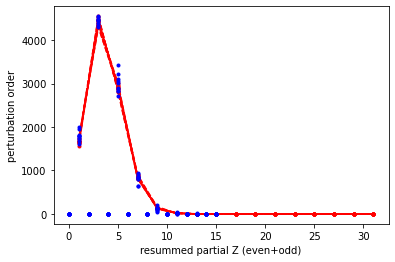

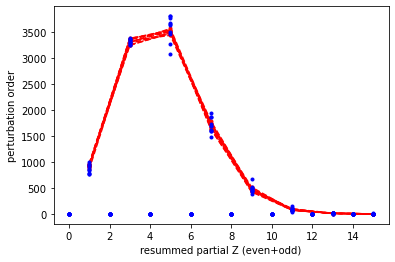

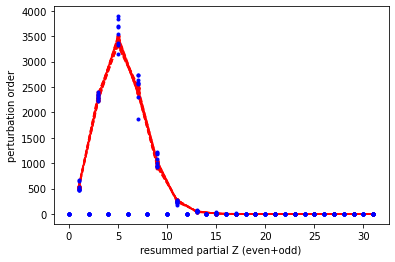

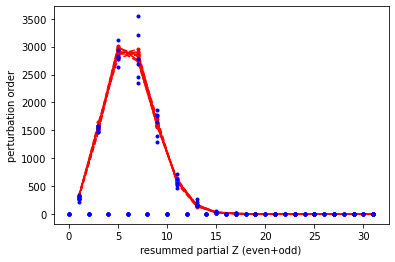

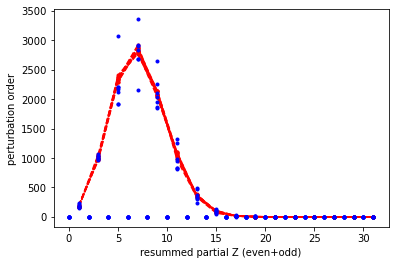

In [ ]:
for id in ids:
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist_sign'][i])
            k = np.arange(N//2)*2+1
            h = fuse_eo(A[f'hist_sign'][i])
            plt.plot(k,h.real,'r.--')

        k0 = 3
        with HDFArchive(files2[id],'r') as B:
            for i in range(Ns2[id]):
                N = len(B[f'hist_sign'][i])
                k = np.arange(N)
                if B[f'hist_sign'][i][k0] != 0 and A[f'hist_sign'][i][k0-1]+A[f'hist_sign'][i][k0] != 0:
                    h = B[f'hist_sign'][i]/B[f'hist_sign'][i][k0] * (A[f'hist_sign'][i][k0]+A[f'hist_sign'][i][k0-1])
                    plt.plot(k,h.real,'b.')
                else:
                    print(f"invalid {i}")
    plt.ylabel("real resummed partial Z (even+odd)")
    plt.xlabel("perturbation order")
    plt.show()

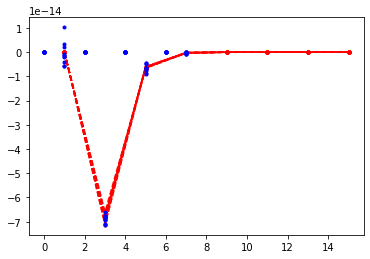

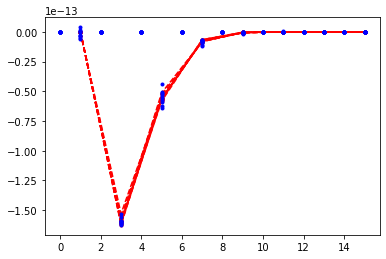

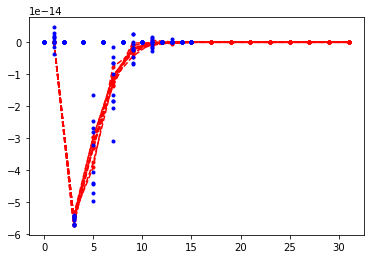

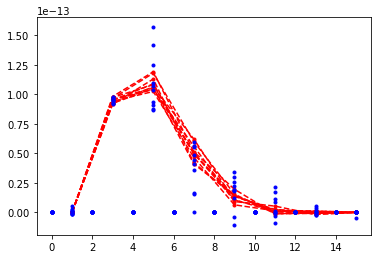

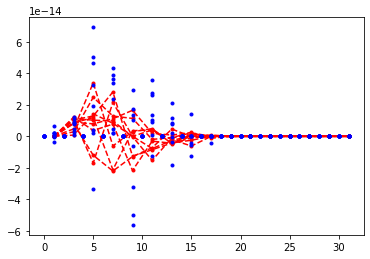

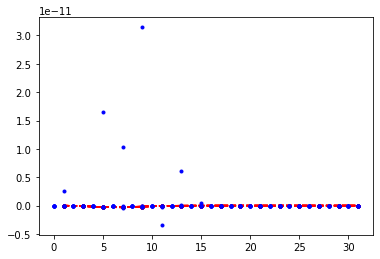

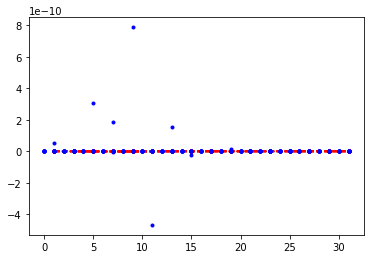

In [ ]:
for id in ids:
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist_sign'][i])
            k = np.arange(N//2)*2+1
            h = fuse_eo(A[f'hist_sign'][i])
            plt.plot(k,h.imag,'r.--')

        k0 = 3
        with HDFArchive(files2[id],'r') as B:
            for i in range(Ns2[id]):
                N = len(B[f'hist_sign'][i])
                k = np.arange(N)
                if B[f'hist_sign'][i][k0] != 0 and A[f'hist_sign'][i][k0-1]+A[f'hist_sign'][i][k0] != 0:
                    h = B[f'hist_sign'][i]/B[f'hist_sign'][i][k0] * (A[f'hist_sign'][i][k0]+A[f'hist_sign'][i][k0-1])
                    plt.plot(k,h.imag,'b.')
                else:
                    print(f"invalid {i}")
    plt.ylabel("imaginary resummed partial Z (even+odd)")
    plt.xlabel("perturbation order")
    plt.show()

## Density

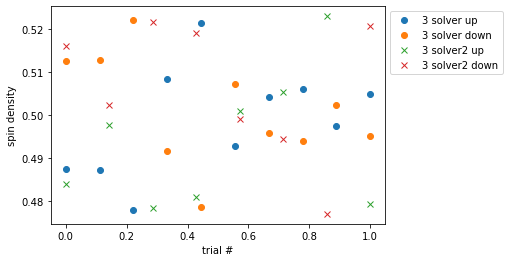

In [15]:
id1 = 3
for id in [id1]:
    k = np.linspace(0,1,Ns[id])
    n = np.zeros((Ns[id],2),dtype=complex)
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            n[i] = A[f"n"][i]+delta0[id]
    plt.plot(k,n.real,'o',label=[f"{id} solver up",f"{id} solver down"])

    k = np.linspace(0,1,Ns2[id])
    n2 = np.zeros((Ns2[id],2),dtype=complex)
    with HDFArchive(files2[id],'r') as B:
        for i in range(Ns2[id]):
            n2[i] = B[f"n"][i]+delta0[id]
    plt.plot(k,n2.real,'x',label=[f"{id} solver2 up",f"{id} solver2 down"])

plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("spin density")
plt.xlabel("trial #")
plt.show()

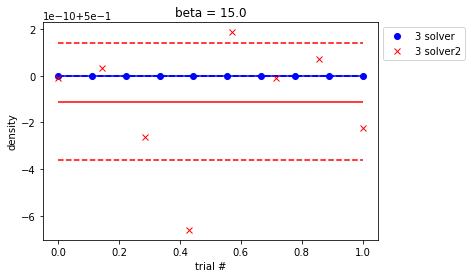

In [8]:
id1 = 3

for id in [id1]:
    k = np.linspace(0,1,Ns[id])
    n = np.zeros(Ns[id],dtype=complex)
    with HDFArchive(files[id],'r') as A:
        n = np.sum(A[f"n"],axis=1)+delta0[id]
    plt.hlines(n.real.mean(),0,1,color='b')
    plt.hlines(n.real.mean()+np.sqrt(n.var()),0,1,color='b',linestyles='--')
    plt.hlines(n.real.mean()-np.sqrt(n.var()),0,1,color='b',linestyles='--')
    plt.plot(k,n.real,'bo',label=f"{id} solver ")

    k = np.linspace(0,1,Ns2[id])
    n2 = np.zeros(Ns2[id],dtype=complex)
    with HDFArchive(files2[id],'r') as B:
        n2 = np.sum(B[f"n"],axis=1)+delta0[id]
    plt.hlines(n2.real.mean(),0,1,color='r')
    plt.hlines(n2.real.mean()+np.sqrt(n2.var()),0,1,color='r',linestyles='--')
    plt.hlines(n2.real.mean()-np.sqrt(n2.var()),0,1,color='r',linestyles='--')
    plt.plot(k,n2.real,'rx',label=f"{id} solver2")

plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("density")
plt.xlabel("trial #")
plt.title(f"beta = {beta[id1]}")
plt.show()

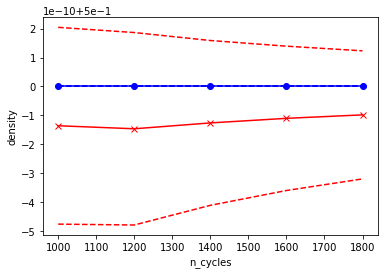

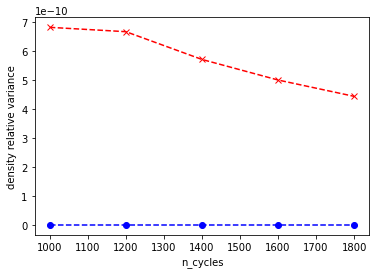

In [10]:
var = np.zeros(nid)
m = np.zeros(nid,dtype=complex)
var2 = np.zeros(nid)
m2 = np.zeros(nid,dtype=complex)

x = n_cycles
xlab = "n_cycles"
for id in ids:
    with HDFArchive(files[id],'r') as A:
            var[id] = (np.sum(A[f"n"],axis=1)+delta0[id]).var()
            m[id] = (np.sum(A[f"n"],axis=1)+delta0[id]).mean()

    with HDFArchive(files2[id],'r') as B:
            var2[id] = (np.sum(B[f"n"],axis=1)+delta0[id]).var()
            m2[id] = (np.sum(B[f"n"],axis=1)+delta0[id]).mean()
plt.plot(x,m.real,'bo-')
plt.plot(x,m.real+np.sqrt(var),'b--')
plt.plot(x,m.real-np.sqrt(var),'b--')

plt.plot(x,m2.real,'rx-')
plt.plot(x,m2.real+np.sqrt(var2),'r--')
plt.plot(x,m2.real-np.sqrt(var2),'r--')

plt.ylabel("density")
plt.xlabel(xlab)
plt.show()

plt.plot(x,np.sqrt(var)/np.abs(m),'bo--')
plt.plot(x,np.sqrt(var2)/np.abs(m2),'rx--')
plt.ylabel("density relative variance")
plt.xlabel(xlab)
plt.show()

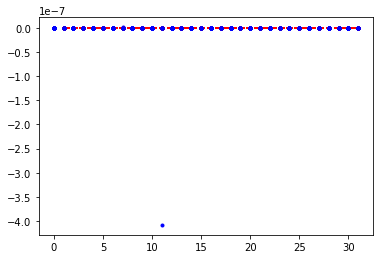

In [ ]:
for id in ids:

    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist_n'][i])
            k = np.arange(N//2)*2+1
            h = fuse_eo(A[f'hist_n'][i])
            plt.plot(k,h.real,'r.--')

        with HDFArchive(files2[id],'r') as B:
            for i in range(Ns2[id]):
                N = len(B[f'hist_n'][i])
                k = np.arange(N)
                h = B[f'hist_n'][i]
                plt.plot(k,h.real,'b.')
plt.ylabel("real partial measured density")
plt.xlabel("perturbation order")
plt.show()

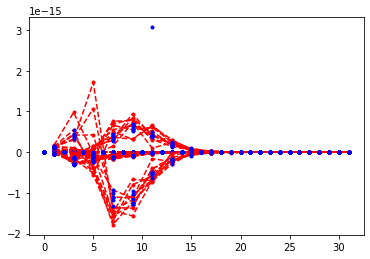

In [ ]:
for id in ids:

    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist_n'][i])
            k = np.arange(N//2)*2+1
            h = fuse_eo(A[f'hist_n'][i])
            plt.plot(k,h.imag,'r.--')

        with HDFArchive(files2[id],'r') as B:
            for i in range(Ns2[id]):
                N = len(B[f'hist_n'][i])
                k = np.arange(N)
                h = B[f'hist_n'][i]
                plt.plot(k,h.imag,'b.')
plt.ylabel("imaginary partial measured density")
plt.xlabel("perturbation order")
plt.show()

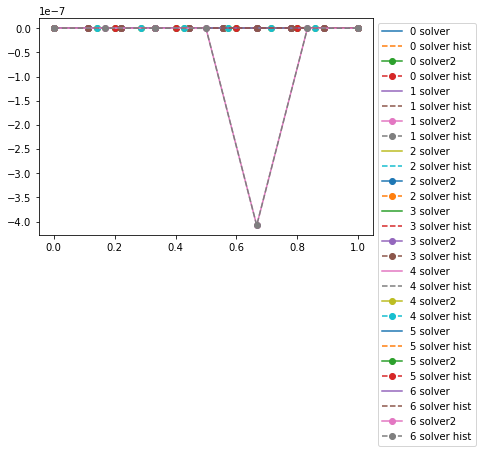

In [ ]:
for id in ids:
    k = np.linspace(0,1,Ns[id])
    n = np.zeros(Ns[id],dtype=complex)
    n_hist = np.zeros(Ns[id],dtype=complex)
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            n[i] = np.sum(A[f"n"][i])
            n_hist[i] = np.sum(A[f"hist_n"][i])
    plt.plot(k,n.real,label=f"{id} solver")
    plt.plot(k,n_hist.real,'--',label=f"{id} solver hist")

    k = np.linspace(0,1,Ns2[id])
    n2 = np.zeros(Ns2[id],dtype=complex)
    n_hist2 = np.zeros(Ns2[id],dtype=complex)
    with HDFArchive(files2[id],'r') as B:
        for i in range(Ns2[id]):
            n2[i] = np.sum(B[f"n"][i])
            n_hist2[i] = np.sum(B[f"hist_n"][i])
    plt.plot(k,n2.real,'o-',label=f"{id} solver2")
    plt.plot(k,n_hist2.real,'o--',label=f"{id} solver hist")

plt.legend(bbox_to_anchor=(1,1))
plt.ylabel("real measured density")
plt.xlabel("perturbation order")
plt.show()

## Double Occupancy

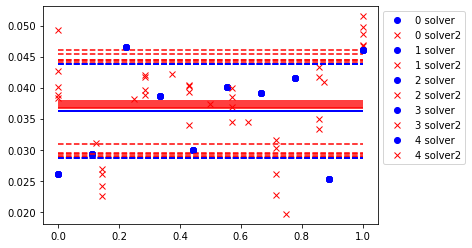

In [16]:
id1 = 3
for id in [id1]:
    k = np.linspace(0,1,Ns[id])
    d = np.zeros(Ns[id],dtype=complex)
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            d[i] = A[f"d"][i]+(delta0[id])*np.sum(A[f"n"][i])+delta0[id]**2+delta[id]**2

    plt.hlines(d.real.mean(),0,1,color='b')
    plt.hlines(d.real.mean()+np.sqrt(d.var()),0,1,color='b',linestyles='--')
    plt.hlines(d.real.mean()-np.sqrt(d.var()),0,1,color='b',linestyles='--')
    plt.plot(k,d.real,'bo',label=f"{id} solver")

    k = np.linspace(0,1,Ns2[id])
    d2 = np.zeros(Ns2[id],dtype=complex)
    with HDFArchive(files2[id],'r') as B:
        for i in range(Ns2[id]):
            d2[i] = B[f"d"][i]+(delta0[id])*np.sum(B[f"n"][i])+delta0[id]**2+delta[id]**2

    plt.hlines(d2.real.mean(),0,1,color='r')
    plt.hlines(d2.real.mean()+np.sqrt(d2.var()),0,1,color='r',linestyles='--')
    plt.hlines(d2.real.mean()-np.sqrt(d2.var()),0,1,color='r',linestyles='--')
    plt.plot(k,d2.real,"rx",label=f"{id} solver2")

plt.legend(bbox_to_anchor=(1,1))
plt.show()

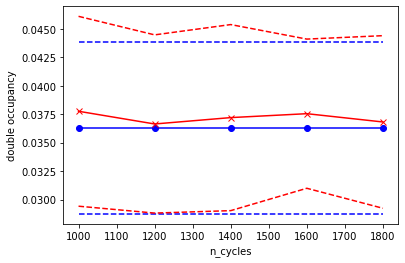

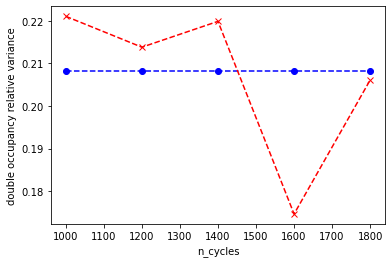

In [12]:
var = np.zeros(nid)
m = np.zeros(nid,dtype=complex)
var2 = np.zeros(nid)
m2 = np.zeros(nid,dtype=complex)

for id in ids:
    with HDFArchive(files[id],'r') as A:
            var[id] = (A[f"d"]+(delta0[id])*np.sum(A[f"n"],axis=1)+delta0[id]**2+delta[id]**2).var()
            m[id] = (A[f"d"]+(delta0[id])*np.sum(A[f"n"],axis=1)+delta0[id]**2+delta[id]**2).mean()

    with HDFArchive(files2[id],'r') as B:
            var2[id] = (B[f"d"]+(delta0[id])*np.sum(B[f"n"],axis=1)+delta0[id]**2+delta[id]**2).var()
            m2[id] = (B[f"d"]+(delta0[id])*np.sum(B[f"n"],axis=1)+delta0[id]**2+delta[id]**2).mean()

x = n_cycles
xlab = "n_cycles"
plt.plot(x,m.real,'bo-')
plt.plot(x,m.real+np.sqrt(var),'b--')
plt.plot(x,m.real-np.sqrt(var),'b--')

plt.plot(x,m2.real,'rx-')
plt.plot(x,m2.real+np.sqrt(var2),'r--')
plt.plot(x,m2.real-np.sqrt(var2),'r--')

plt.ylabel("double occupancy")
plt.xlabel(xlab)
plt.show()

plt.plot(x,np.sqrt(var)/np.abs(m),'bo--')
plt.plot(x,np.sqrt(var2)/np.abs(m2),'rx--')
plt.ylabel("double occupancy relative variance")
plt.xlabel(xlab)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


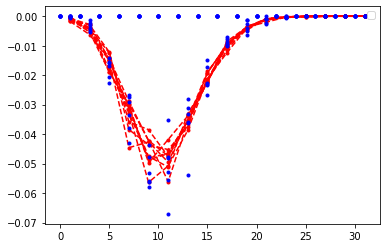

In [ ]:
for id in [10]:

    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist_d'][i])
            k = np.arange(N//2)*2+1
            h = fuse_eo(A[f'hist_d'][i])
            plt.plot(k,h.real,'r.--')

        with HDFArchive(files2[id],'r') as B:
            for i in range(Ns2[id]):
                N = len(B[f'hist_d'][i])
                k = np.arange(N)
                h = B[f'hist_d'][i]
                plt.plot(k,h.real,'b.')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

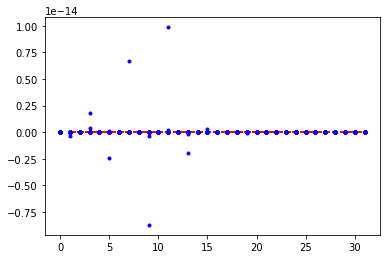

In [ ]:
for id in ids:

    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            N = len(A[f'hist_d'][i])
            k = np.arange(N//2)*2+1
            h = fuse_eo(A[f'hist_d'][i])
            plt.plot(k,h.imag,'r.--')

        with HDFArchive(files2[id],'r') as B:
            for i in range(Ns2[id]):
                N = len(B[f'hist_d'][i])
                k = np.arange(N)
                h = B[f'hist_d'][i]
                plt.plot(k,h.imag,'b.')
plt.show()

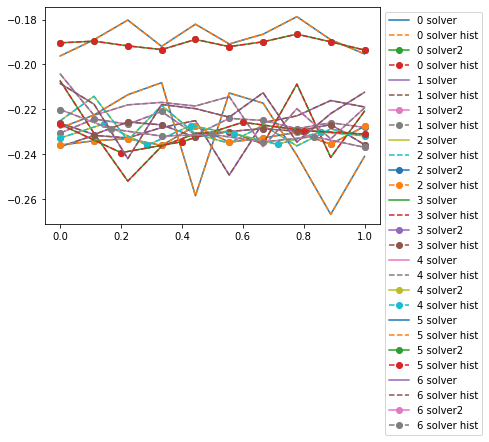

In [ ]:
for id in ids:
    k = np.linspace(0,1,Ns[id])
    d = np.zeros(Ns[id],dtype=complex)
    d_hist = np.zeros(Ns[id],dtype=complex)
    with HDFArchive(files[id],'r') as A:
        for i in range(Ns[id]):
            d[i] = A[f"d"][i]
            d_hist[i] = np.sum(A[f"hist_d"][i])
    plt.plot(k,d.real,label=f"{id} solver")
    plt.plot(k,d_hist.real,'--',label=f"{id} solver hist")

    k = np.linspace(0,1,Ns2[id])
    d2 = np.zeros(Ns2[id],dtype=complex)
    d_hist2 = np.zeros(Ns2[id],dtype=complex)
    with HDFArchive(files2[id],'r') as B:
        for i in range(Ns2[id]):
            d2[i] = B[f"d"][i]
            d_hist2[i] = np.sum(B[f"hist_d"][i])
    plt.plot(k,d2.real,'o-',label=f"{id} solver2")
    plt.plot(k,d_hist2.real,'o--',label=f"{id} solver hist")

plt.legend(bbox_to_anchor=(1,1))
plt.show()

## $M(i\omega_n)$

In [ ]:
Nom = 10 # # of Matsubara frequencies

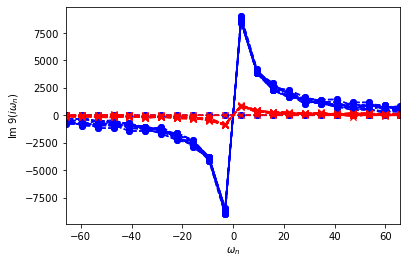

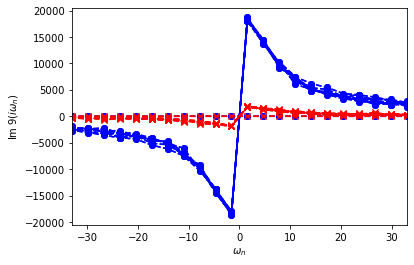

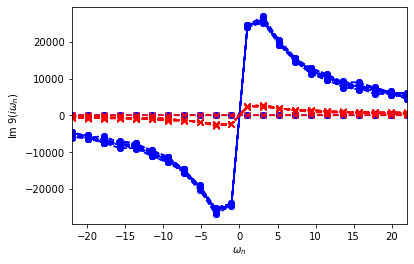

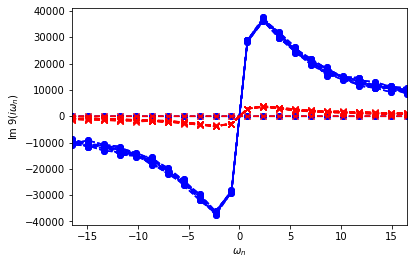

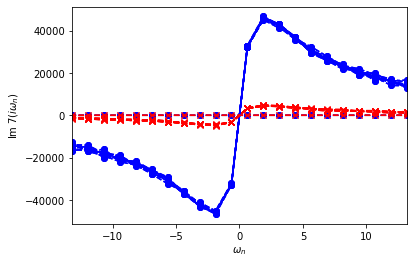

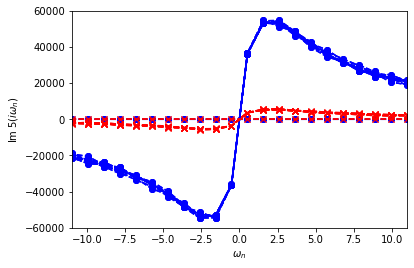

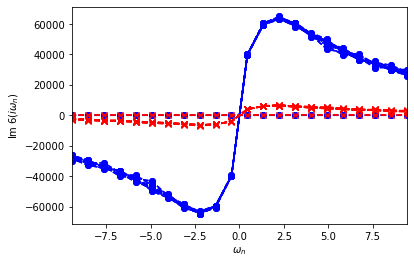

In [ ]:
for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            oplot(A[f'M_iw'][i].imag, 'bo--')

    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            oplot(B[f'M_iw'][i].imag, 'rx--')
            
    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

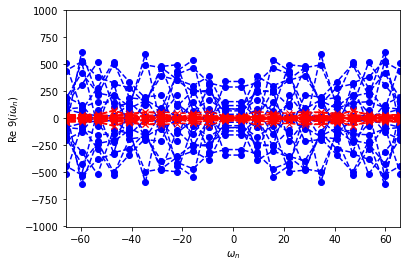

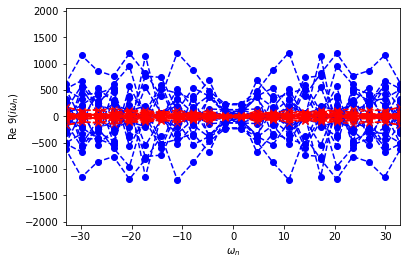

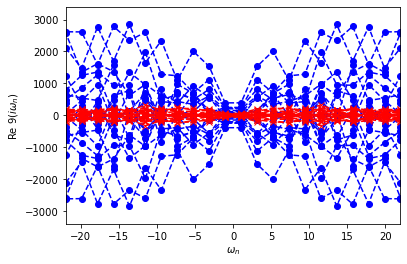

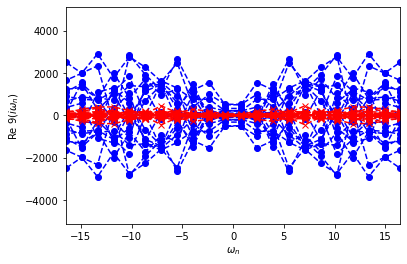

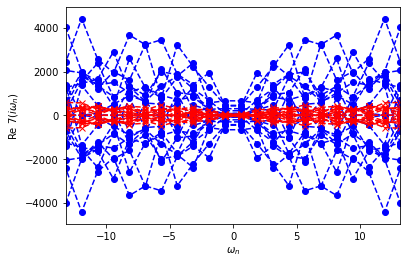

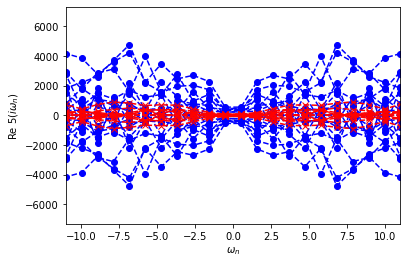

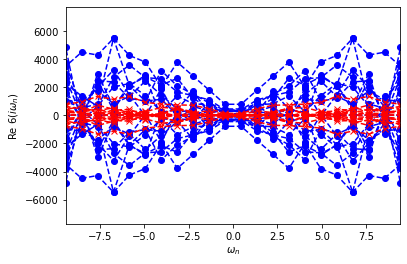

In [ ]:
for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            oplot(A[f'M_iw'][i].real, 'bo--')

    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            oplot(B[f'M_iw'][i].real, 'rx--')
            
    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

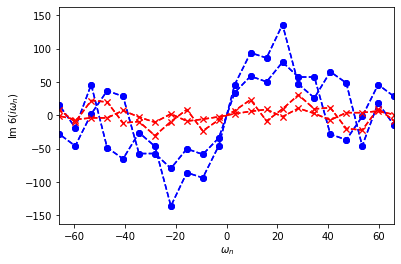

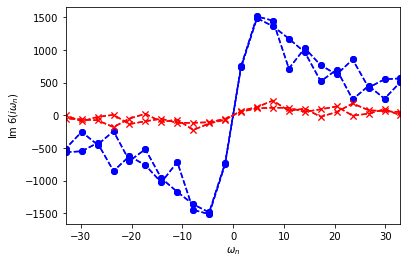

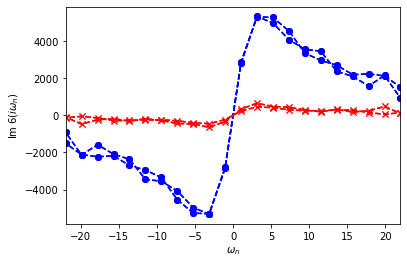

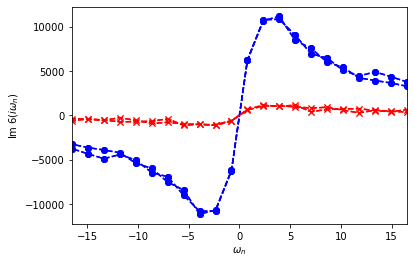

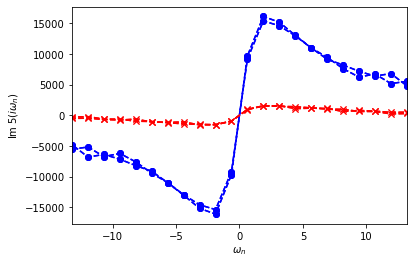

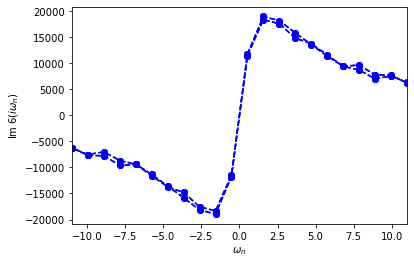

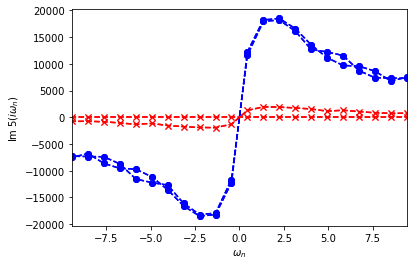

In [ ]:
k0 = 5

for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            if A[f'k'][i]==k0:
                oplot(A[f'Mk_iw'][i].imag, 'bo--')
    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            if B[f'k'][i]==k0:
                oplot(B[f'Mk_iw'][i].imag, 'rx--')
    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

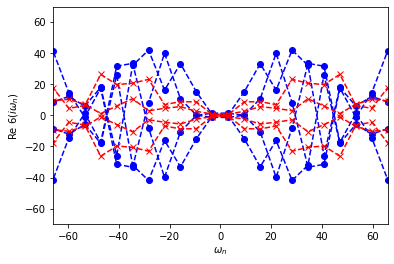

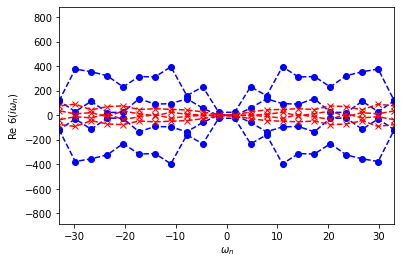

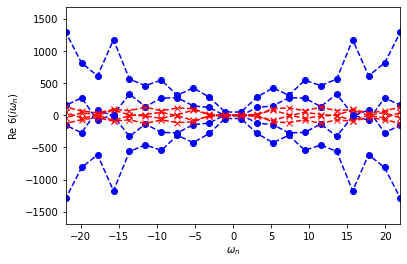

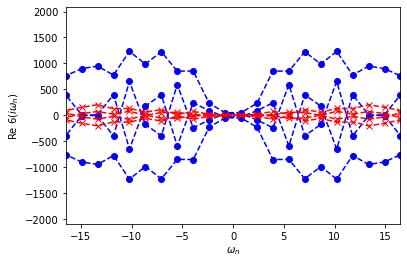

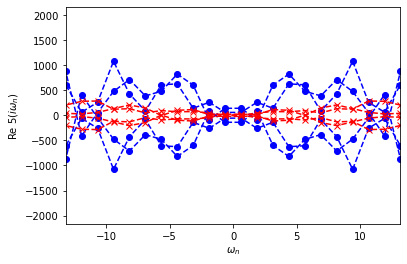

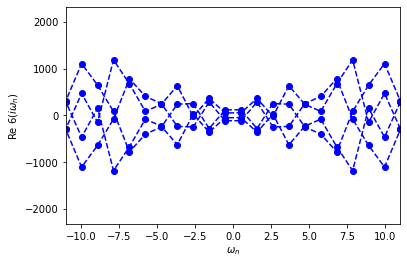

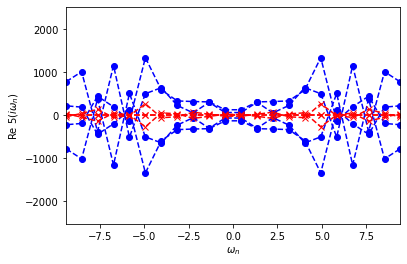

In [ ]:
k0 = 5

for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            if A[f'k'][i]==k0:
                oplot(A[f'Mk_iw'][i].real, 'bo--')
    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            if B[f'k'][i]==k0:
                oplot(B[f'Mk_iw'][i].real, 'rx--')
    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

## GF

In [ ]:
Nom = 10 # # of Matsubara frequencies

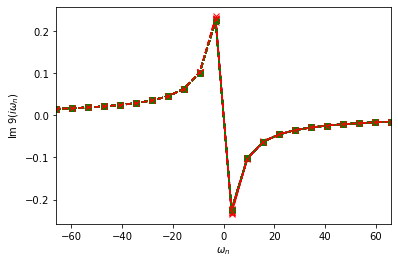

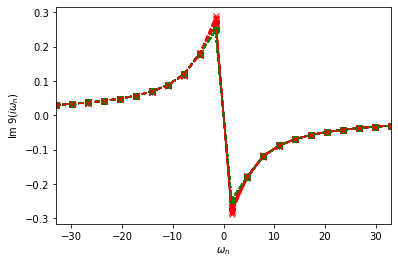

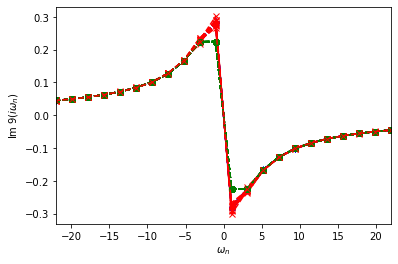

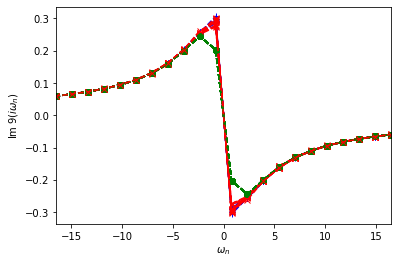

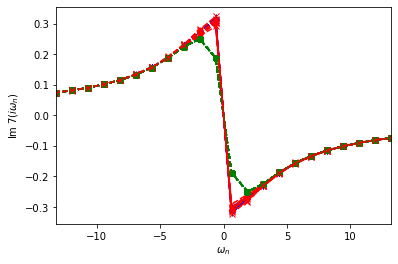

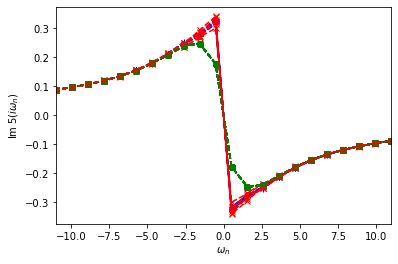

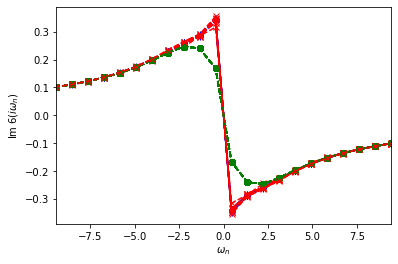

In [ ]:
for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            oplot(A[f'G0_iw'][i].imag, 'go--')
            oplot(A[f'G_iw'][i].imag, 'b+--')


    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            oplot(B[f'G0_iw'][i].imag, 'go--')
            oplot(B[f'G_iw'][i].imag, 'rx--')

    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

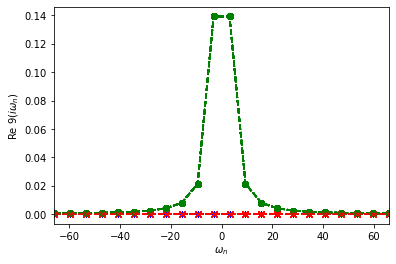

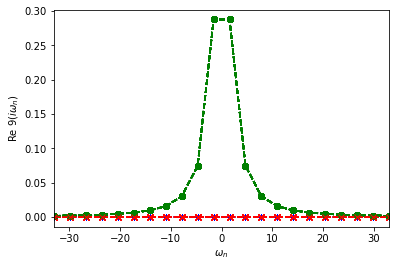

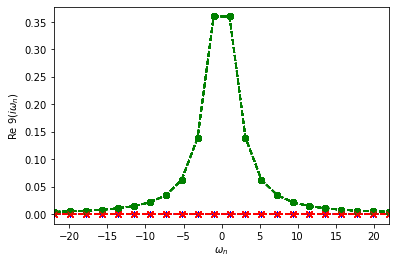

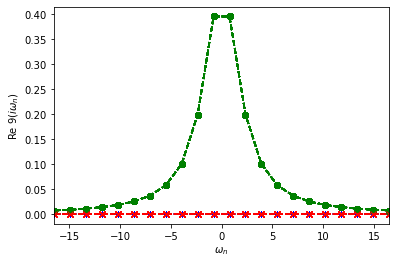

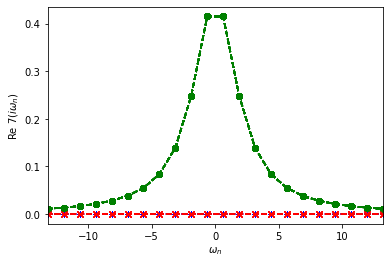

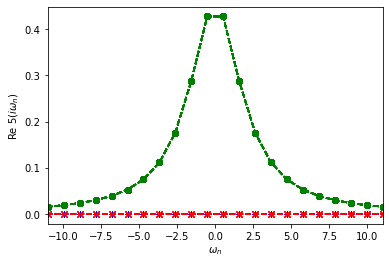

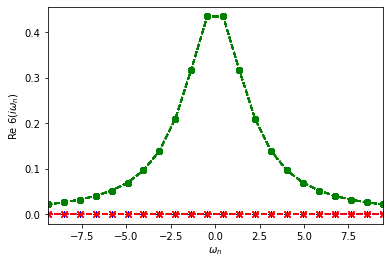

In [ ]:
for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            oplot(A[f'G0_iw'][i].real, 'go--')
            oplot(A[f'G_iw'][i].real, 'b+--')


    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            oplot(B[f'G0_iw'][i].real, 'go--')
            oplot(B[f'G_iw'][i].real, 'rx--')

    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

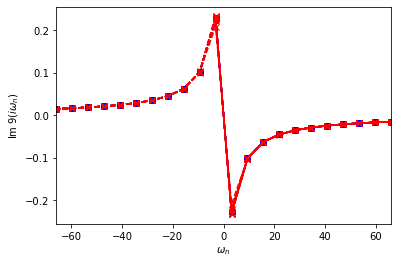

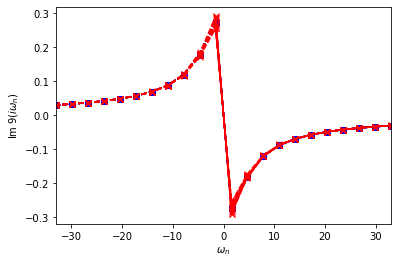

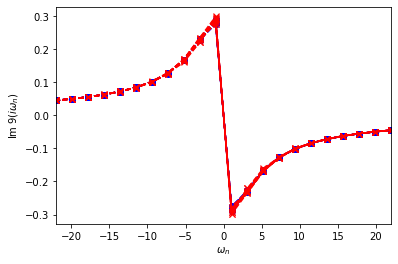

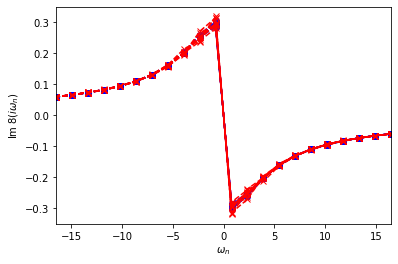

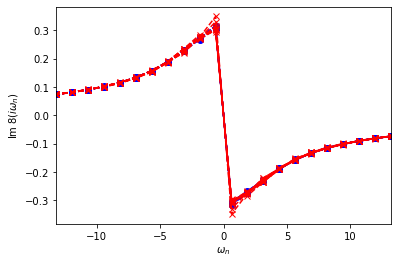

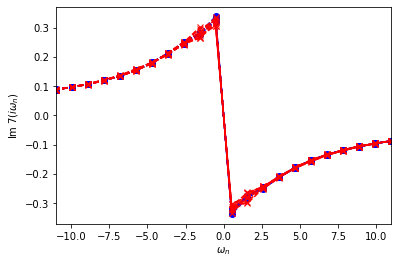

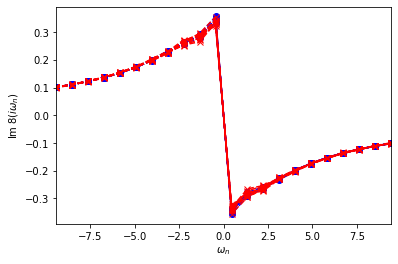

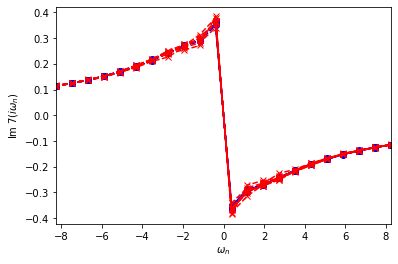

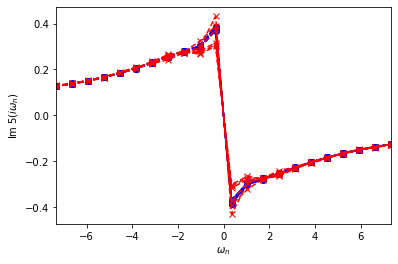

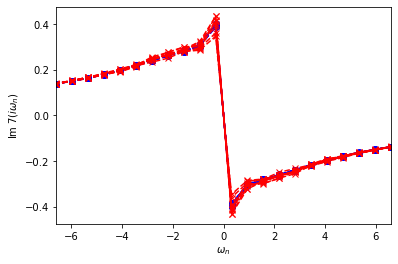

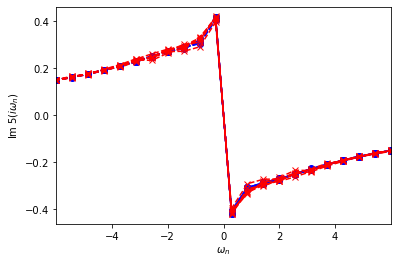

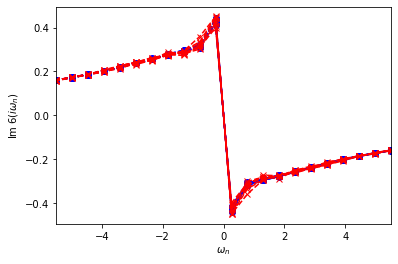

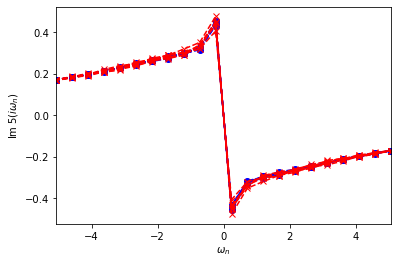

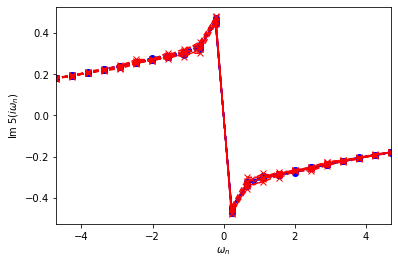

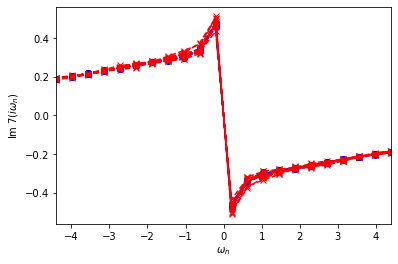

In [ ]:
for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            oplot(A[f'G_iw'][i].imag, 'bo--')


    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            oplot(B[f'G_iw'][i].imag, 'rx--')

    plt.xlim(-xm,xm)

    plt.legend().remove()
    plt.show()

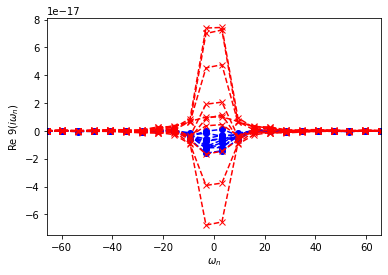

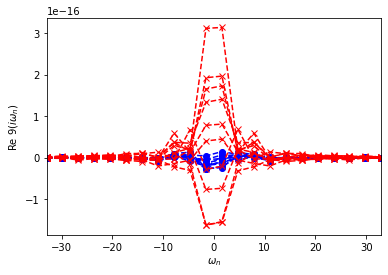

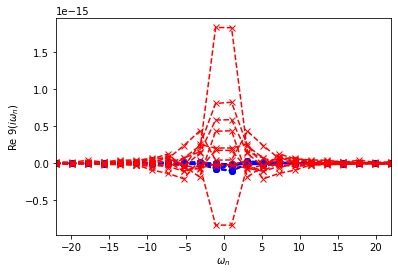

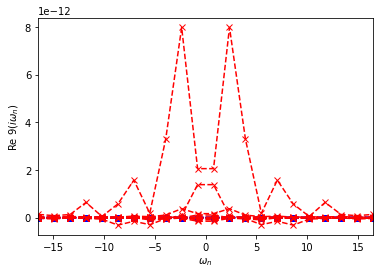

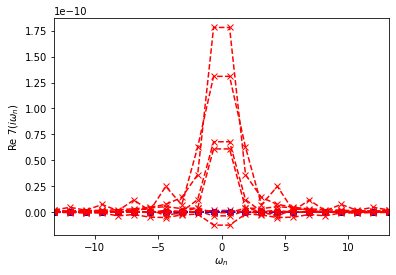

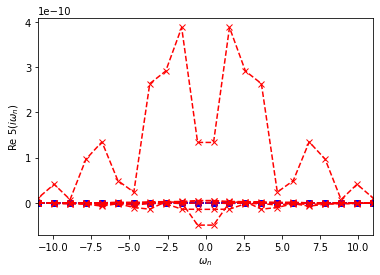

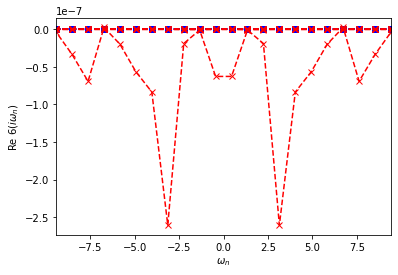

In [ ]:
for id in ids:
    xm = (2*Nom+1)*np.pi/beta[id]
    with HDFArchive(files[id],'r') as A:
        for i in range(A[f'N']):
            oplot(A[f'G_iw'][i].real, 'bo--')


    with HDFArchive(files2[id],'r') as B:
        for i in range(B[f'N']):
            oplot(B[f'G_iw'][i].real, 'rx--')

    plt.xlim(-xm,xm)
    plt.legend().remove()
    plt.show()

## End